In [9]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

In [10]:
# Set the path to Tesseract OCR executable (after installation from Mannheim link)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [11]:
# Preprocess image: grayscale, denoise, threshold
def process_image(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_free = cv2.fastNlMeansDenoising(gray_image)
    binary_thresh = cv2.threshold(noise_free, 0, 255, 
                                  cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary_thresh

In [12]:
# Detect text regions with pytesseract
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [13]:
# Draw bounding boxes on detected text
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            x, y, width, height = (
                detected_boxes['left'][i],
                detected_boxes['top'][i],
                detected_boxes['width'][i],
                detected_boxes['height'][i]
            )
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [14]:
# Draw bounding boxes on detected text
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            x, y, width, height = (
                detected_boxes['left'][i],
                detected_boxes['top'][i],
                detected_boxes['width'][i],
                detected_boxes['height'][i]
            )
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [15]:
# Extract text from detected regions
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes["level"])
    for i in range(num_boxes):
        if int(detected_boxes["conf"][i]) > 60:
            text_content.append(detected_boxes["text"][i])
    return " ".join(text_content)

In [16]:
# Show image using matplotlib
def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()


Original Image:


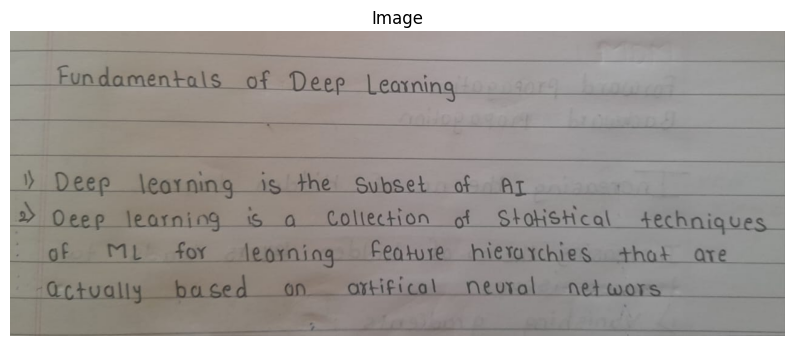


Image with Text Detection Regions:


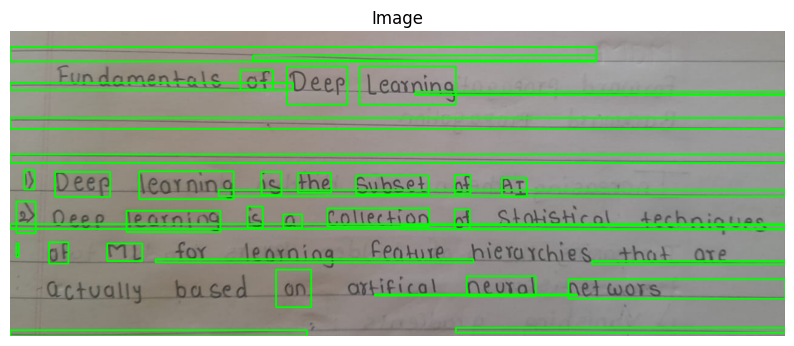


Detected Text:
    of Deep Learning                   ) Deep learning is the Subset of ar » learning is o Collection of _ of ML   on neural networs   


In [17]:

# Main program
img_path = r"C:\Users\samik\Desktop\DL_IMG.jpg"
image_loaded = cv2.imread(img_path)

if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    print("\nOriginal Image:")
    show_image(image_loaded)

    preprocessed_image = process_image(image_loaded)
    text_boxes = text_regions(preprocessed_image)
    image_with_boxes = mark_text_regions(image_loaded, text_boxes)

    print("\nImage with Text Detection Regions:")
    show_image(image_with_boxes)

    extracted_text = extract_text(text_boxes)
    print("\nDetected Text:")
    print(extracted_text if extracted_text.strip() else "No text detected.")